In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import cv2
%matplotlib inline
import nltk


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [ ]:
nltk.data.path

['/root/nltk_data',
 '/usr/share/nltk_data',
 '/usr/local/share/nltk_data',
 '/usr/lib/nltk_data',
 '/usr/local/lib/nltk_data',
 '/usr/nltk_data',
 '/usr/lib/nltk_data']

In [7]:
from nltk.corpus import PlaintextCorpusReader
input_data = pd.read_csv("gdrive/My Drive/MajorProject/NLP-Data-sets/Dats sets/ISEAR_DS.csv")

In [8]:
input_data.shape

(7515, 3)

In [9]:
input_data.head(100)

,joy,On days when I feel close to my partner and other friends. \nWhen I feel at peace with myself and also experience a close \ncontact with people whom I regard greatly.,Unnamed: 2
0,fear,Every time I imagine that someone I love or I ...,NaN
1,anger,When I had been obviously unjustly treated and...,NaN
2,sadness,When I think about the short time that we live...,NaN
3,disgust,At a gathering I found myself involuntarily si...,NaN
4,shame,When I realized that I was directing the feeli...,NaN
...,...,...,...
95,sadness,Last year when I worked during the Summer holi...,NaN
96,disgust,When a dog is left whining outside a shop.,NaN
97,shame,When I promised to help a friend over a weeken...,NaN
98,guilt,When I realized that I had three more examinat...,NaN


In [10]:
input_data.columns = ["sentiment","text","Unnamed"]

In [11]:
input_data.head(100)

,sentiment,text,Unnamed
0,fear,Every time I imagine that someone I love or I ...,NaN
1,anger,When I had been obviously unjustly treated and...,NaN
2,sadness,When I think about the short time that we live...,NaN
3,disgust,At a gathering I found myself involuntarily si...,NaN
4,shame,When I realized that I was directing the feeli...,NaN
...,...,...,...
95,sadness,Last year when I worked during the Summer holi...,NaN
96,disgust,When a dog is left whining outside a shop.,NaN
97,shame,When I promised to help a friend over a weeken...,NaN
98,guilt,When I realized that I had three more examinat...,NaN


In [12]:
input_data['Unnamed']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
7510    NaN
7511    NaN
7512    NaN
7513    NaN
7514    NaN
Name: Unnamed, Length: 7515, dtype: object

In [13]:
data = input_data.drop(['Unnamed'],axis = 1)

In [14]:
data.shape

(7515, 2)

In [15]:
data

,sentiment,text
0,fear,Every time I imagine that someone I love or I ...
1,anger,When I had been obviously unjustly treated and...
2,sadness,When I think about the short time that we live...
3,disgust,At a gathering I found myself involuntarily si...
4,shame,When I realized that I was directing the feeli...
...,...,...
7510,shame,Two years back someone invited me to be the tu...
7511,shame,I had taken the responsibility to do something...
7512,fear,I was at home and I heard a loud sound of spit...
7513,guilt,I did not do the homework that the teacher had...


In [16]:
data['sentiment'].value_counts()

joy        1091
sadness    1082
anger      1079
fear       1076
shame      1071
disgust    1066
guilt      1049
guit          1
Name: sentiment, dtype: int64

In [17]:
data.columns.values

array(['sentiment', 'text'], dtype=object)

In [18]:
data

,sentiment,text
0,fear,Every time I imagine that someone I love or I ...
1,anger,When I had been obviously unjustly treated and...
2,sadness,When I think about the short time that we live...
3,disgust,At a gathering I found myself involuntarily si...
4,shame,When I realized that I was directing the feeli...
...,...,...
7510,shame,Two years back someone invited me to be the tu...
7511,shame,I had taken the responsibility to do something...
7512,fear,I was at home and I heard a loud sound of spit...
7513,guilt,I did not do the homework that the teacher had...


In [19]:
raw_data=np.array(data['text'])
raw_data

array(['Every time I imagine that someone I love or I could contact a  \nserious illness, even death.',
       'When I had been obviously unjustly treated and had no possibility  \nof elucidating this.',
       'When I think about the short time that we live and relate it to  \nthe periods of my life when I think that I did not use this  \nshort time.',
       ...,
       'I was at home and I heard a loud sound of spitting outside the  \ndoor.  I thought that one of my family members would step on the spit  \nand bring the germs in the house.',
       'I did not do the homework that the teacher had asked us to do.  I  \nwas scolded immediately.',
       'I had shouted at my younger brother and he was always afraid when  \nI called out loudly.'],
      dtype=object)

In [20]:
len(raw_data)

7515

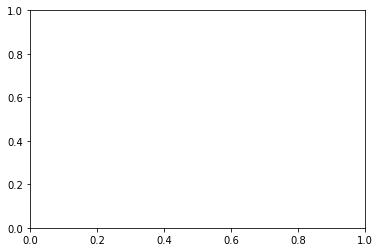

In [21]:
fig,ax = plt.subplots()

In [22]:
value = data['sentiment'].value_counts()

In [23]:
points = value.index
frequency = value.values

In [25]:
ax.bar(points,frequency);

In [26]:
ax.set_title('DataSet')

Text(0.5, 1.0, 'DataSet')

In [27]:
ax.set_ylabel('sentiments')

Text(3.200000000000003, 0.5, 'sentiments')

In [28]:
ax.set_ylabel('Frequency')

Text(3.200000000000003, 0.5, 'Frequency')

In [29]:
value

joy        1091
sadness    1082
anger      1079
fear       1076
shame      1071
disgust    1066
guilt      1049
guit          1
Name: sentiment, dtype: int64

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
countvec1 = CountVectorizer()
dtm_v1 = pd.DataFrame(countvec1.fit_transform(input_data['text']).toarray(), 
                      columns=countvec1.get_feature_names(), index=None)
dtm_v1['sentiment'] = input_data['sentiment']
dtm_v1.head(10)

,00,000,10,100,1000,102,10t,10th,10yrs,11,110km,11th,12,120,12th,13,13th,14,140,1400,15,150,1500,16,17,18,180側,18th,19,1960,1966,1968,1970,1972,1975,1976,1977,1978,1979,1980,...,yield,yielding,york,you,young,younger,youngest,youngish,youngsters,youngstters,your,yournals,yours,yourself,youth,youths,yr,yrs,yugoslavia,yukky,zagging,zaire,zalu,zambezi,zambia,zealand,zealander,zeeland,zemba,zero,zesco,zhu,zig,zip,zipper,zomba,zombies,zone,zoophiliac,sentiment
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,fear
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,anger
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,sadness
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,disgust
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,shame
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,guilt
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,joy
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,fear
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,anger
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,sadness


In [31]:
dtm_v1.shape


(7515, 8954)

Refining DTM

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import pandas as pd
import re
import nltk

Text preprocessing

In [33]:
stemmer = PorterStemmer()
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
def tokenize(text):
  text = stemmer.stem(text) 
  text = re.sub(r'\W+|\d+|_', ' ', text) 
  tokens = nltk.word_tokenize(text) 
  return tokens


In [34]:
countvec = CountVectorizer(min_df= 5, tokenizer=tokenize,stop_words=stopwords.words('english'))


In [35]:
dtm = pd.DataFrame(countvec.fit_transform(input_data['text']).toarray(), columns=countvec.get_feature_names(), index=None)



/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'r', 'themselv', 'thi', 'v', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [36]:
countvec

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function tokenize at 0x7fb03e03e6a8>,
                vocabulary=None)

In [37]:
dtm.shape

(7515, 2102)

In [38]:
dtm

,abilities,ability,able,abortion,abroad,absence,absent,absolutely,abused,abusing,academic,accept,acceptance,accepted,accident,accidentally,accomodation,accompanied,accomplish,account,accused,achieve,achieved,acquaintance,across,act,acted,acting,action,actions,activities,acts,actually,admission,admit,admitted,advances,advantage,advice,affair,...,witnessed,woke,woman,women,wonderful,wondering,wood,word,words,wore,work,worked,worker,working,world,worms,worried,worry,worse,worst,would,wound,wristwatch,write,writing,written,wrong,wrongly,wrote,yard,year,years,yelled,yesterday,yet,young,younger,yrs,z,zambia
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7510,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
7511,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7512,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7513,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
dtm['sentiment'] = input_data['sentiment']

In [40]:
dtm.head(100)

,abilities,ability,able,abortion,abroad,absence,absent,absolutely,abused,abusing,academic,accept,acceptance,accepted,accident,accidentally,accomodation,accompanied,accomplish,account,accused,achieve,achieved,acquaintance,across,act,acted,acting,action,actions,activities,acts,actually,admission,admit,admitted,advances,advantage,advice,affair,...,woke,woman,women,wonderful,wondering,wood,word,words,wore,work,worked,worker,working,world,worms,worried,worry,worse,worst,would,wound,wristwatch,write,writing,written,wrong,wrongly,wrote,yard,year,years,yelled,yesterday,yet,young,younger,yrs,z,zambia,sentiment
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,fear
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,anger
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,sadness
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,disgust
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,shame
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,sadness
96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,disgust
97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,shame
98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,guilt


In [41]:
dtm.shape

(7515, 2103)

DTM dataset splitting into test and train

In [42]:
df_train = dtm[:5250]
df_test = dtm[2250:]

Classification on isear dataset

First we are going to apply Naive bayes algorithm

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [44]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
X_train= df_train.drop(['sentiment'], axis=1) 
clf.fit(X_train, df_train['sentiment'])
clf.score(X_train,df_train['sentiment'])*100

73.84761904761905

In [45]:
X_test= df_test.drop(['sentiment'], axis=1)
clf.score(X_test,df_test['sentiment'])*100

66.19183285849952

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn import model_selection


In [47]:
X6 = dtm.drop(['sentiment'], axis=1)
Y6 = dtm['sentiment']
X_train6, X_test6, Y_train6, Y_test6 = model_selection.train_test_split(X6, Y6, test_size=0.25, random_state=0)

In [48]:
model6 = MultinomialNB()
model6.fit(X_train6, Y_train6)
predicted6 = model6.predict(X_test6)
matrix6 = confusion_matrix(Y_test6, predicted6)
acc6 = accuracy_score(Y_test6, predicted6)*100
print(acc6)
print(matrix6)


55.508249068653534
[[112  38  14  41  14  14  25]
 [ 33 142  19  19  14  10  25]
 [ 19  11 174  10  24  16  15]
 [ 28  16  16 128  14  22  39]
 [ 12   8  13  15 203  24   6]
 [ 18   8  19  18  28 163  21]
 [ 32  22  16  41  30   9 121]]


In [49]:

from sklearn.metrics import classification_report
print(classification_report(Y_test6,predicted6))

              precision    recall  f1-score   support

       anger       0.44      0.43      0.44       258
     disgust       0.58      0.54      0.56       262
        fear       0.64      0.65      0.64       269
       guilt       0.47      0.49      0.48       263
         joy       0.62      0.72      0.67       281
     sadness       0.63      0.59      0.61       275
       shame       0.48      0.45      0.46       271

    accuracy                           0.56      1879
   macro avg       0.55      0.55      0.55      1879
weighted avg       0.55      0.56      0.55      1879



KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
K_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)


X_train= df_train.drop(['sentiment'], axis=1)
K_classifier.fit(X_train, df_train['sentiment'])

X_train= df_train.drop(['sentiment'], axis=1)

K_classifier.fit(X_train, df_train['sentiment'])

X_test= df_test.drop(['sentiment'], axis=1)
K_classifier.score(X_test,df_test['sentiment'])*100


45.10921177587844

In [ ]:
X_train= df_train.drop(['sentiment'], axis=1)
K_classifier.score(X_train,df_train['sentiment'])*100


55.352380952380955

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn import model_selection


In [ ]:
X7 = dtm.drop(['sentiment'], axis=1)
Y7 = dtm['sentiment']


In [ ]:
X_train7, X_test7, Y_train7, Y_test7 = model_selection.train_test_split(X7, Y7, test_size=0.25, random_state=0)

In [ ]:
model7 = KNeighborsClassifier()
model7.fit(X_train7, Y_train7)
predicted7 = model7.predict(X_test7)
matrix7 = confusion_matrix(Y_test7, predicted7)
acc7 = accuracy_score(Y_test7, predicted7)*100
print(acc7)
print(matrix7)


29.96274614156466
[[ 47  38  19  31  64  43  16]
 [ 35  73  15  21  56  47  15]
 [ 24  32  74  16  85  28  10]
 [ 38  23  22  58  60  45  17]
 [ 23  19  18  11 173  31   6]
 [ 45  19  15  11  74 105   6]
 [ 28  47  17  30  87  29  33]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test7,predicted7))

              precision    recall  f1-score   support

       anger       0.20      0.18      0.19       258
     disgust       0.29      0.28      0.28       262
        fear       0.41      0.28      0.33       269
       guilt       0.33      0.22      0.26       263
         joy       0.29      0.62      0.39       281
     sadness       0.32      0.38      0.35       275
       shame       0.32      0.12      0.18       271

    accuracy                           0.30      1879
   macro avg       0.31      0.30      0.28      1879
weighted avg       0.31      0.30      0.28      1879



Decision Tree

In [ ]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

Decision_clf = DecisionTreeClassifier()
X_train= df_train.drop(['sentiment'], axis=1)

Decision_clf.fit(X_train, df_train['sentiment'])

X_test= df_test.drop(['sentiment'], axis=1)
Decision_clf.score(X_test,df_test['sentiment'])*100


77.64482431149098

In [ ]:
X_train= df_train.drop(['sentiment'], axis=1)
Decision_clf.score(X_train,df_train['sentiment'])*100


99.58095238095238

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn import model_selection


In [ ]:
X8 = dtm.drop(['sentiment'], axis=1)
Y8 = dtm['sentiment']
X_train8, X_test8, Y_train8, Y_test8 = model_selection.train_test_split(X8, Y8, test_size=0.25, random_state=0)
model8 = DecisionTreeClassifier()
model8.fit(X_train8, Y_train8)
predicted8 = model8.predict(X_test8)
matrix8 = confusion_matrix(Y_test8, predicted8)
acc8 = accuracy_score(Y_test8, predicted8)*100
print(acc8)
print(matrix8)



48.16391697711549
[[ 88  40  17  43  25  18  27]
 [ 26 126  17  38  18  16  21]
 [ 23  15 157  18  21  16  19]
 [ 26  18  22 122  23  19  33]
 [ 17  16  15  24 165  22  22]
 [ 26  12  16  27  25 144  25]
 [ 37  25  19  44  29  14 103]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test8,predicted8))

              precision    recall  f1-score   support

       anger       0.36      0.34      0.35       258
     disgust       0.50      0.48      0.49       262
        fear       0.60      0.58      0.59       269
       guilt       0.39      0.46      0.42       263
         joy       0.54      0.59      0.56       281
     sadness       0.58      0.52      0.55       275
       shame       0.41      0.38      0.40       271

    accuracy                           0.48      1879
   macro avg       0.48      0.48      0.48      1879
weighted avg       0.48      0.48      0.48      1879



SVM

In [ ]:
import sklearn
svc = sklearn.svm.SVC()

In [ ]:
SVC_classifier = SVC(kernel = 'linear', random_state = 0)
X_train= df_train.drop(['sentiment'], axis=1)
SVC_classifier.fit(X_train, df_train['sentiment'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
X_test= df_test.drop(['sentiment'], axis=1)
SVC_classifier.score(X_test,df_test['sentiment'])*100


75.04273504273505

In [ ]:
X_train= df_train.drop(['sentiment'], axis=1)
Decision_clf.score(X_train,df_train['sentiment'])*100


99.58095238095238

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn import model_selection


In [ ]:
X9 = dtm.drop(['sentiment'], axis=1)
Y9 = dtm['sentiment']


In [ ]:
X_train9, X_test9, Y_train9, Y_test9 = model_selection.train_test_split(X9, Y9, test_size=0.25, random_state=0)

In [ ]:
model9 = SVC()
model9.fit(X_train9, Y_train9)
predicted9 = model9.predict(X_test9)
matrix9 = confusion_matrix(Y_test9, predicted9)
acc9 = accuracy_score(Y_test9, predicted9)*100
print(acc9)
print(matrix9)


53.96487493347525
[[140  33  15  25  13  12  20]
 [ 48 137  10  21  16   7  23]
 [ 26  17 159  13  19  10  25]
 [ 56   6  22 118  14  12  35]
 [ 36   9  14  10 191   8  13]
 [ 34  13  14  25  23 140  26]
 [ 40  16  14  34  27  11 129]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test9,predicted9))

              precision    recall  f1-score   support

       anger       0.37      0.54      0.44       258
     disgust       0.59      0.52      0.56       262
        fear       0.64      0.59      0.62       269
       guilt       0.48      0.45      0.46       263
         joy       0.63      0.68      0.65       281
     sadness       0.70      0.51      0.59       275
       shame       0.48      0.48      0.48       271

    accuracy                           0.54      1879
   macro avg       0.56      0.54      0.54      1879
weighted avg       0.56      0.54      0.54      1879



Using SVC method of svm Of kernel rbf

In [ ]:
SVC_classifier = SVC(kernel = 'rbf', random_state = 0)
X_train= df_train.drop(['sentiment'], axis=1)

SVC_classifier.fit(X_train, df_train['sentiment'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
X_test= df_test.drop(['sentiment'], axis=1)

In [ ]:
SVC_classifier.score(X_test,df_test['sentiment'])*100

73.04843304843305

In [ ]:
X_train= df_train.drop(['sentiment'], axis=1)

In [ ]:
X_train= df_train.drop(['sentiment'], axis=1)
Decision_clf.score(X_train,df_train['sentiment'])*100


99.58095238095238

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test9,predicted9))


              precision    recall  f1-score   support

       anger       0.37      0.54      0.44       258
     disgust       0.59      0.52      0.56       262
        fear       0.64      0.59      0.62       269
       guilt       0.48      0.45      0.46       263
         joy       0.63      0.68      0.65       281
     sadness       0.70      0.51      0.59       275
       shame       0.48      0.48      0.48       271

    accuracy                           0.54      1879
   macro avg       0.56      0.54      0.54      1879
weighted avg       0.56      0.54      0.54      1879



Classification on Twitter dataset

In [ ]:
dataset_twitter = pd.read_csv("gdrive/My Drive/Data_sets/emotion.data")

In [ ]:
dataset_twitter.head()

,Unnamed: 0,text,emotions
0,27383,i feel awful about it too because it s my job ...,sadness
1,110083,im alone i feel awful,sadness
2,140764,ive probably mentioned this before but i reall...,joy
3,100071,i was feeling a little low few days back,sadness
4,2837,i beleive that i am much more sensitive to oth...,love


In [ ]:
dataset_twitter.shape

(416809, 3)

In [ ]:
data_tweet = dataset_twitter[:7515]
data_tweet.shape

(7515, 3)

In [ ]:
data_tweet['emotions'].value_counts()

joy         2518
sadness     2221
anger       1000
fear         862
love         619
surprise     295
Name: emotions, dtype: int64

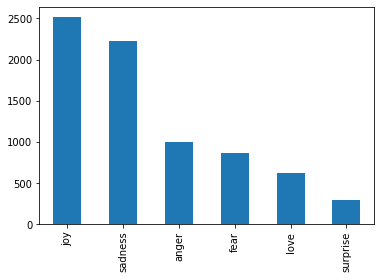

In [ ]:
data_tweet.emotions.value_counts().plot.bar()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
countvec1 = CountVectorizer()
dtm_v1 = pd.DataFrame(countvec1.fit_transform(data_tweet['text']).toarray(), columns=countvec1.get_feature_names(), index=None)

In [ ]:
dtm_v1['emotions'] = data_tweet['emotions']

In [ ]:
dtm_v1.head(100)

,aaargh,aad,aadmi,aam,aaron,aarons,ab,aback,abandoned,abandonment,abang,abba,abdomen,aberdeen,abide,abigail,abilities,ability,abit,abject,able,abnormal,aboard,abolutely,abominable,aborted,about,above,abrams,abroad,abrupt,abruptly,abruzzi,abs,absolute,absolutely,absorb,absorbed,abstained,abstract,...,york,you,youd,youll,young,younger,youngish,your,youre,yours,yourself,youth,youths,youtube,youu,youve,yr,yuan,yuchun,yukihiro,yukkies,yuletide,yummy,yuuki,zalora,zara,zealand,zealously,zelhenget,zero,zhong,zhuahen,zillion,zombie,zone,zoom,zpg,zu,zuri,zuu
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.exceptions import FitFailedWarning
from sklearn.model_selection import GridSearchCV


In [ ]:
clf1 = MultinomialNB()

In [ ]:
clf2 =  DecisionTreeClassifier()

In [ ]:
clf3 = SVC(kernel = 'linear', random_state = 0)


In [ ]:
X = dtm.drop(['emotions'], axis=1) 


In [ ]:
Y = dtm['emotions']## Features

In [ ]:
print('10-fold cross validation:\n')
labels = ['Naive Bayes', 'Decision Tree', 'Support Vector Machine']

for clf, label in zip([clf1, clf2, clf3], labels):

    scores = model_selection.cross_val_score(clf, X, Y, 
                                              cv=10, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f  [%s]"
          % (scores.mean(), label))      ## scores.std() ,(+/- %0.2f)

10-fold cross validation:



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'joy'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'fear'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

Accuracy: nan  [Naive Bayes]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'joy'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'fear'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'fear'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on t

Accuracy: nan  [Decision Tree]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'fear'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'fear'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'fear'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

Accuracy: nan  [Support Vector Machine]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'sadness'

  FitFailedWarning)


In [ ]:
voting_clf_hard = VotingClassifier(estimators = [(labels[0], clf1),
                                                 (labels[1], clf2),
                                                 (labels[2], clf3)],
                                   voting = 'hard')

In [ ]:
labels_new = ['Naive Bayes', 'Decision Tree', 'Support Vector Machine','Voting_Classifier_Hard']

In [ ]:
for (clf, label) in zip([clf1, clf2, clf3, voting_clf_hard], labels_new):
    scores = model_selection.cross_val_score(clf, X,Y, cv=10,scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"  % (scores.mean(), scores.std(), label)) 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'joy'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'fear'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

Accuracy: nan (+/- nan) [Naive Bayes]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'joy'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'fear'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'fear'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on t

Accuracy: nan (+/- nan) [Decision Tree]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'fear'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'fear'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'fear'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

Accuracy: nan (+/- nan) [Support Vector Machine]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'joy'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'fear'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'fear'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on t

Accuracy: nan (+/- nan) [Voting_Classifier_Hard]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'fear'

  FitFailedWarning)
